# Análisis de Churn 

El análisis de churn, o análisis de abandono, es un proceso que evalúa la tasa de pérdida de clientes de una empresa.

## Importal librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
import warnings

In [2]:
warnings.filterwarnings("ignore")
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Cargando bases de datos

# Lectura de datos
Carguemos el archivo de datos...

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ruta = '//content/drive/MyDrive/00 DISK01.A 22.03.HACKATHON.KIN/DATA/'

In [3]:
#Utilizamos la Base de datos completa para realizar un mejor análisis
# clients = pd.read_csv( ruta + 'clients_table.txt', sep=",")
# clients

clients = pd.read_csv('clients_table.txt', sep=",")
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.000,0.000,121219.280,2019-01-08,NaN,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.000,1.000,159663.590,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaN,1979-02-27
4,15365443,EBERLE,Italy,Male,1.000,0.000,35521.280,2014-01-26,2015-12-04,1972-12-21
...,...,...,...,...,...,...,...,...,...,...
1544995,14878861,LEVENSTEIN,Italy,Female,0.000,0.000,99110.940,2019-08-26,NaN,1990-05-19
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaN,1984-04-08
1544997,14667679,MAASSEN,Spain,Male,1.000,0.000,83143.540,2014-12-19,2018-12-10,1963-05-09
1544998,14513378,KENIMER,France,Male,1.000,1.000,153913.740,2012-05-25,2014-05-03,1976-11-09


In [4]:
# credit_score = pd.read_csv(ruta + 'credit_score_table.txt', sep=",")
# credit_score

credit_score = pd.read_csv('credit_score_table.txt', sep=",")
credit_score

,CustomerId,Date,Score
0,14759722,2018-07,717
1,15907276,2011-09,562
2,15346641,2013-01,604
3,15595126,2018-08,469
4,15227788,2013-09,655
...,...,...,...
19499995,15963320,2014-04,737
19499996,15647539,2012-06,615
19499997,14993580,2018-01,651
19499998,15860358,2011-11,528


In [5]:
# products = pd.read_csv(ruta + 'products_table.txt', sep=",")
# products

products = pd.read_csv('products_table.txt', sep=",")
products

,ContractId,CustomerId,Products
0,5Xo9sCduOGo5EhBYhzKrSlLIA,14993808,Product B
1,3nQbqbnpTeSkYIJWT1UDe1GZ1,15560417,Product B
2,PD9KwDPOwyJWO6LJKPGBbkrCz,15406428,Product C
3,IhS7pz8lu07LCZSqYNlL0fuLP,15604313,Product B
4,ftUey4oVmkZj8RaBVFH6SNzVM,14952409,Product C
...,...,...,...
3739187,gG68mjjODmTNM21QPEeAKr0DZ,14723530,Product C
3739188,yWf0PHzqSjJvadbdMji4XtX5T,15837225,Product D
3739189,5kerYoMKP03ebWSrloZBjmWKz,14661828,Product C
3739190,CdnDnTfN3YYOozLACqf9fBak1,15559545,Product D


In [6]:
# transactions = pd.read_csv(ruta + 'transactions_table.txt', sep=",")
# transactions

transactions = pd.read_csv('transactions_table.txt', sep=",")
transactions

,CustomerId,Transaction,Value
0,15653320,trans_4,-294.030
1,14955663,trans_3,1297.970
2,15218505,trans_4,191.280
3,15391934,trans_3,2299.070
4,14847291,trans_3,1612.100
...,...,...,...
7499995,14927077,trans_2,80.060
7499996,15525450,trans_2,-732.020
7499997,15827138,trans_4,-24.890
7499998,14742523,trans_4,-549.890


## Filtrando

### Contratos del 2015 en adelante

In [7]:
clients['application_date'] = pd.to_datetime(clients['application_date'], format='%Y/%m/%d')
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.000,0.000,121219.280,2019-01-08,NaN,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.000,1.000,159663.590,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaN,1979-02-27
4,15365443,EBERLE,Italy,Male,1.000,0.000,35521.280,2014-01-26,2015-12-04,1972-12-21
...,...,...,...,...,...,...,...,...,...,...
1544995,14878861,LEVENSTEIN,Italy,Female,0.000,0.000,99110.940,2019-08-26,NaN,1990-05-19
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaN,1984-04-08
1544997,14667679,MAASSEN,Spain,Male,1.000,0.000,83143.540,2014-12-19,2018-12-10,1963-05-09
1544998,14513378,KENIMER,France,Male,1.000,1.000,153913.740,2012-05-25,2014-05-03,1976-11-09


In [8]:
clients['application_date'].dt.year.unique()

array([2018, 2019, 2012, 2014, 2013, 2017, 2016, 2015], dtype=int64)

In [9]:
clients = clients[clients['application_date'].dt.year >= 2015]
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.000,0.000,121219.280,2019-01-08,NaN,1980-08-03
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaN,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaN,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
...,...,...,...,...,...,...,...,...,...,...
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaN,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaN,1964-08-27
1544995,14878861,LEVENSTEIN,Italy,Female,0.000,0.000,99110.940,2019-08-26,NaN,1990-05-19
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaN,1984-04-08


In [10]:
clients['application_date'].dt.year.unique()

array([2018, 2019, 2017, 2016, 2015], dtype=int64)

In [12]:
#shape-devuelve una tupla con el tamaño del array
clients.shape

(623242, 10)

### Las operaciones estuvieron cerradas en el 2019 en Italia

In [13]:
clients['Geography'].unique()

array(['Germany', 'Italy', 'Spain', 'France', nan], dtype=object)

In [14]:
clients['exit_date'] = pd.to_datetime(clients['exit_date'], format='%Y/%m/%d')
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.000,0.000,121219.280,2019-01-08,NaT,1980-08-03
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
...,...,...,...,...,...,...,...,...,...,...
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27
1544995,14878861,LEVENSTEIN,Italy,Female,0.000,0.000,99110.940,2019-08-26,NaT,1990-05-19
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08


In [15]:
clients['application_date'].dt.year.unique()

array([2018, 2019, 2017, 2016, 2015], dtype=int64)

In [16]:
clients = clients.drop(clients[(clients['Geography'] == 'Italy') & (clients['application_date'].dt.year == 2019)].index)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11
...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08


In [17]:
clients.shape

(560947, 10)

### Un contrato

In [18]:
clients[clients.duplicated(subset=['CustomerId'],keep=False)].sort_values(by=['CustomerId'])

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
111543,14500027,TAHERI,France,Female,0.000,1.000,28622.560,2018-02-13,2018-08-17,1977-09-09
918868,14500027,TAHERI,France,Female,0.000,1.000,28622.560,2018-02-13,2018-08-17,1977-09-09
363568,14500040,AUCHMOODY,France,Female,1.000,1.000,81642.910,2019-08-09,NaT,1976-04-04
603139,14500040,AUCHMOODY,France,Female,1.000,1.000,81642.910,2019-08-09,NaT,1976-04-04
169459,14500056,ESPINO,Spain,Male,0.000,0.000,20255.320,2018-05-29,2019-02-08,1980-10-10
...,...,...,...,...,...,...,...,...,...,...
849433,15999577,EARNHARDT,Italy,Female,1.000,0.000,188858.480,2018-12-29,NaT,1994-10-01
85424,15999622,GRASSE,Germany,Female,0.000,1.000,99516.720,2018-10-17,NaT,1970-01-24
426943,15999622,GRASSE,Germany,Female,0.000,1.000,99516.720,2018-10-17,NaT,1970-01-24
318846,15999782,CASHOUR,Germany,Male,0.000,0.000,76474.720,2019-11-09,NaT,1973-06-15


In [19]:
clients = clients.drop_duplicates(subset=['CustomerId'])
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11
...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08


In [20]:
clients.shape

(544615, 10)

### Información Perdida

In [21]:
clients['Missing'] = clients.isnull().sum(axis=1)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Missing
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,1
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30,0
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,0
...,...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,1
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,1
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08,1


In [22]:
clients.isnull().sum()

CustomerId               0
Surname              26128
Geography            22685
Gender               26114
HasCrCard            26114
IsActiveMember       26114
EstimatedSalary      26114
application_date         0
exit_date           419717
birth_date           26114
Missing                  0
dtype: int64

<AxesSubplot:>

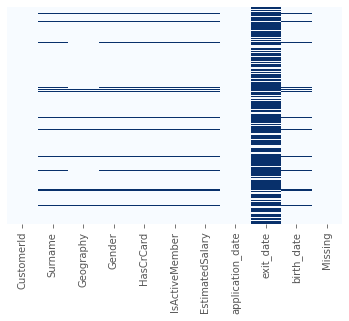

In [23]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
sns.heatmap(clients.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [24]:
criterio = (len(clients.columns) - 1) * 0.75 #75% de información perdida
criterio

7.5

In [25]:
clients['Missing'].max()

8

In [26]:
clients.drop(clients[clients.Missing > criterio].index, inplace = True)

In [27]:
clients.drop(columns='Missing',inplace=True)

In [28]:
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11
...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08


In [29]:
clients.shape

(526496, 10)

### 2 años de información

In [30]:
clients['Años_Info'] = clients['application_date'].dt.year
clients['Años_Info'] = 2019 - clients['Años_Info']
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Años_Info
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,1
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,0
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30,2
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1
...,...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,1
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,0
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,1
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08,2


In [31]:
clients['Años_Info'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [32]:
clients.drop(clients[clients.Años_Info >= 2].index, inplace=True)

In [33]:
clients.drop(columns='Años_Info',inplace=True)

In [34]:
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11
15,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26
...,...,...,...,...,...,...,...,...,...,...
1544982,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27


In [35]:
clients.shape

(491796, 10)

## Otras variables relevantes

### Creación de columna cantidad de Productos (Número de productos)

In [36]:
products_group_ = products.groupby(['CustomerId']).agg({'Products':'count'})
products_group = products_group_.reset_index()
products_group

,CustomerId,Products
0,14500000,4
1,14500001,2
2,14500002,2
3,14500003,3
4,14500004,3
...,...,...
1499995,15999995,2
1499996,15999996,3
1499997,15999997,4
1499998,15999998,3


In [37]:
clients = pd.merge(clients,products_group,on='CustomerId',how='left')
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3
...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2


### Creación de columna Saldo de los clientes

In [38]:
transactions.sort_values(['CustomerId', 'Transaction'])

,CustomerId,Transaction,Value
1852244,14500000,trans_1,1456.630
4223144,14500000,trans_2,-317.810
544602,14500000,trans_3,1047.960
1619405,14500000,trans_4,-249.610
7326999,14500000,trans_5,-1937.170
...,...,...,...
7474320,15999999,trans_1,3021.860
1767927,15999999,trans_2,-274.520
4786428,15999999,trans_3,2002.890
6699514,15999999,trans_4,-364.250


In [39]:
transactions.columns

Index(['CustomerId', 'Transaction', 'Value'], dtype='object')

In [40]:
balance = transactions.groupby(['CustomerId']).agg({'Value':'sum'}).reset_index()
balance

,CustomerId,Value
0,14500000,0.000
1,14500001,51405.610
2,14500002,120763.500
3,14500003,149896.710
4,14500004,143061.530
...,...,...
1499995,15999995,-0.000
1499996,15999996,174792.730
1499997,15999997,0.000
1499998,15999998,103504.950


In [41]:
clients = pd.merge(clients,balance,on='CustomerId',how='left')
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Value
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000
...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760


In [42]:
clients.rename(columns={"Value": "Saldo"}, inplace=True)

### Creación de la columna Score (Credit Score) o puntaje 

In [43]:
credit_score['Date'] = pd.to_datetime(credit_score['Date'], format='%Y/%m/%d')
credit_score.sort_values(['CustomerId', 'Date'])

,CustomerId,Date,Score
98330,14500000,2018-09-01,502
6776798,14500000,2018-10-01,661
12286591,14500000,2018-11-01,628
19361889,14500000,2018-12-01,784
3468524,14500000,2019-01-01,701
...,...,...,...
3573188,15999999,2012-11-01,555
3501967,15999999,2012-12-01,574
7105887,15999999,2013-01-01,512
454439,15999999,2013-02-01,735


In [44]:
credit_score['Month'] = credit_score['Date'].dt.month
credit_score['Year'] = credit_score['Date'].dt.year
credit_score

,CustomerId,Date,Score,Month,Year
0,14759722,2018-07-01,717,7,2018
1,15907276,2011-09-01,562,9,2011
2,15346641,2013-01-01,604,1,2013
3,15595126,2018-08-01,469,8,2018
4,15227788,2013-09-01,655,9,2013
...,...,...,...,...,...
19499995,15963320,2014-04-01,737,4,2014
19499996,15647539,2012-06-01,615,6,2012
19499997,14993580,2018-01-01,651,1,2018
19499998,15860358,2011-11-01,528,11,2011


In [45]:
clients['Month'] = clients['application_date'].dt.month
clients['Year'] = clients['application_date'].dt.year
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Saldo,Month,Year
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,12,2018
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,6,2019
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,2,2018
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,2,2018
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,9,2018
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,4,2018
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,2,2019
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,11,2018


In [46]:
clients = pd.merge(clients, credit_score, on=['CustomerId', 'Month','Year'],how='left')
clients.drop(['Month', 'Year','Date'], axis = 1 , inplace = True)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Saldo,Score
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497


In [47]:
clients.shape

(491796, 13)

### Creacion de la columns Edad o Age

In [48]:
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Saldo,Score
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497


In [49]:
clients['birth_date'] = pd.to_datetime(clients['birth_date'], format='%Y/%m/%d')
clients['Age'] = (clients['application_date'] - clients['birth_date']) / np.timedelta64(1, 'Y')

In [50]:
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Saldo,Score,Age
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21.238
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40.307
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35.114
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43.620
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41.674
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29.912
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36.532
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54.194


In [51]:
clients['Age'] = clients['Age'].apply(np.floor)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Saldo,Score,Age
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21.000
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40.000
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35.000
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43.000
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41.000
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29.000
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36.000
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54.000


In [52]:
clients.shape

(491796, 14)

3261 Registros

In [53]:
clients.describe()

,CustomerId,HasCrCard,IsActiveMember,EstimatedSalary,Products,Saldo,Score,Age
count,491796.000,484527.000,484527.000,484527.000,491796.000,491796.000,491796.000,484527.000
mean,15247267.062,0.499,0.499,101124.206,2.499,79768.989,650.174,38.506
std,433404.294,0.500,0.500,55520.676,1.118,56643.794,96.731,10.238
min,14500000.000,0.000,0.000,0.000,1.000,-0.000,174.000,18.000
25%,14871483.500,0.000,0.000,61332.650,1.000,34275.350,585.000,31.000
50%,15245448.000,0.000,0.000,100173.440,2.000,76347.260,650.000,38.000
75%,15620647.500,1.000,1.000,139146.980,3.000,118575.655,715.000,45.000
max,15999993.000,1.000,1.000,358654.530,4.000,374633.660,1000.000,88.000


In [54]:
style.use('ggplot')

### Creación de variable nueva “Churn”

In [55]:
# Aquí no es necesario relizar la resta ya que a la hora de reducir la población solo se toma en cuenta los dos ultimos 
# años contando desde el año 2019 menos la fecha de aplicacion por lo que solo es nesesario evaluar que clientes aun 
# no se va filtrando por los valores nulos,

# siendo "0"(no se fue) y "1"(se fue)

clients['churn'] = np.where(clients['exit_date'].isna(), 0, 1)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Saldo,Score,Age,churn
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21.000,0
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40.000,0
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35.000,0
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43.000,1
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41.000,0
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29.000,0
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36.000,0
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54.000,0


### Drop CustomerId

In [56]:
clients.drop('CustomerId',axis='columns',inplace=True)

In [57]:
clients

,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Saldo,Score,Age,churn
0,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21.000,0
1,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40.000,0
2,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35.000,0
3,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43.000,1
4,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41.000,0
491792,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29.000,0
491793,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36.000,0
491794,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54.000,0


### Eliminando valores perdidos (faltantes) en Gender

Los valores perdidos (missing values en inglés) están presente en la mayoría de los conjuntos de datos con los que trabajemos en nuestro día a día. Son aquellos en los que no se almacena ningún valor de datos en una observación.

In [58]:
clients.isnull().sum()

Surname               7282
Geography             4140
Gender                7269
HasCrCard             7269
IsActiveMember        7269
EstimatedSalary       7269
application_date         0
exit_date           385719
birth_date            7269
Products                 0
Saldo                    0
Score                    0
Age                   7269
churn                    0
dtype: int64

<AxesSubplot:>

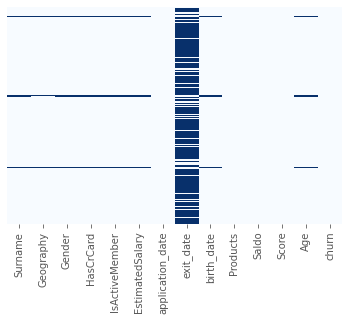

In [59]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
sns.heatmap(clients.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [60]:
clients = clients[clients['Gender'].notna()]
# Dropeo los na gender porque es una variable no imputable y debe ser incluida en el posterior modelo

In [61]:
clients.isnull().sum()

Surname                 13
Geography                0
Gender                   0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
application_date         0
exit_date           383566
birth_date               0
Products                 0
Saldo                    0
Score                    0
Age                      0
churn                    0
dtype: int64

<AxesSubplot:>

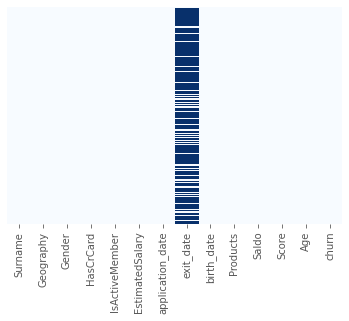

In [62]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
sns.heatmap(clients.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [63]:
clients['Age'] = clients['Age'].astype(np.int64)
clients['HasCrCard'] = clients['HasCrCard'].astype(np.int64)
clients['IsActiveMember'] = clients['IsActiveMember'].astype(np.int64)

In [64]:
clients.shape

(484527, 14)

In [72]:
clients

,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Saldo,Score,Age,churn
0,EIRLS,Germany,Female,0,1,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21,0
1,NALLS,Spain,Male,1,0,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40,0
2,BRASHERS,Italy,Female,0,0,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35,0
3,LABIANCA,Spain,Male,1,1,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43,1
4,DOKKA,France,Male,0,1,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,EISENSTEIN,Germany,Female,1,1,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41,0
491792,MAINETTI,Germany,Male,1,1,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29,0
491793,KUBECK,Germany,Male,0,1,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36,0
491794,TILOTTA,Germany,Female,1,0,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54,0


# MODELOS DE CLASIFICACIÓN 

### Seleccionamos las características para los modelos

In [74]:
data = clients[['HasCrCard', 'IsActiveMember', 'EstimatedSalary','Products', 'Saldo','Score', 'Age', 'churn']]
data.head()

,HasCrCard,IsActiveMember,EstimatedSalary,Products,Saldo,Score,Age,churn
0,0,1,0.000,2,103017.850,684,21,0
1,1,0,140827.980,1,0.000,683,40,0
2,0,0,170661.450,1,83852.980,823,35,0
3,1,1,2612.650,1,119657.240,487,43,1
4,0,1,72210.600,3,65015.000,436,32,0


In [75]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484527 entries, 0 to 491795
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   HasCrCard        484527 non-null  int64  
 1   IsActiveMember   484527 non-null  int64  
 2   EstimatedSalary  484527 non-null  float64
 3   Products         484527 non-null  int64  
 4   Saldo            484527 non-null  float64
 5   Score            484527 non-null  int64  
 6   Age              484527 non-null  int64  
 7   churn            484527 non-null  int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 31.4 MB


### Dividimos los datos en entrenamiento y prueba

In [76]:
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = data.drop(["churn"],axis = 1)

# y es nuestra variable dependiente
y = data.churn

# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

## Modelo Random Forest Classifier. BOSQUE ALEATORIO. 

**Ventajas:**
* Método robusto
* Evita sobre-entrenamiento
* Disminuye la varianza en la predicción respecto a los árboles de decisión
* Prioriza las características más importantes

**Desventajas:**
* Pueden ser lentos con grandes cantidades de datos
* La interpretación del modelo no es transparente

Creamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (árboles de decisión))

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
BA_model = RandomForestClassifier(n_estimators = 19, 
                                  random_state = 2016,
                                  min_samples_leaf = 8,)

### Entrenamiento

In [79]:
BA_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=8, n_estimators=19, random_state=2016)

### Accuracy promedio (Usando datos de Test)

In [80]:
print("Precisión del modelo Random Forest Classifier: {:>7.4f}".format(BA_model.score(X_test, y_test)))

Precisión del modelo Random Forest Classifier:  0.7925


### Matriz de Confusión

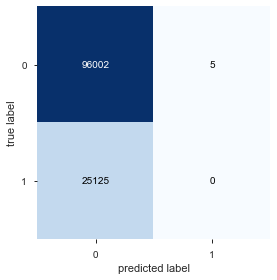

In [85]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo, usando los datos de prueba
y_pred = BA_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()

## Modelo Regresión Logística. Logistic Regression.

Técnica probabilística de clasificación discriminante que permite predecir la probabilidad de obtener una variable categórica dada una combinación lineal en el espacio de entrada

**Ventajas:**
* es más fácil de implementar, interpretar y muy eficiente de entrenar.
* Puede extenderse fácilmente a múltiples clases (regresión multinomial) y una vista probabilística natural de las predicciones  de clases.

**Desventajas:**
* Si el número de observaciones es menor que el número de características, no se debe utilizar la regresión logística; de lo contrario, puede provocar un sobreajuste.
* Solo se puede usar para predecir funciones discretas. Por tanto, la variable dependiente de Regresión logística está ligada al conjunto de números discretos.

Creamos el modelo de Regresión Logística

In [86]:
from sklearn.linear_model import LogisticRegression 

In [87]:
logisticRegr = LogisticRegression(max_iter = 5000)

### Entrenamiento

In [88]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

### Accuracy promedio (Usando datos de Test)

In [90]:
print("Precisión del modelo Regresión Logística: {:>7.4f}".format(logisticRegr.score(X_test, y_test)))

Precisión del modelo Regresión Logística:  0.7926


### Matriz de Confusión 

Predicción

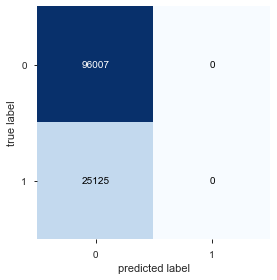

In [91]:
y_pred = logisticRegr.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()

### Comparación:
Precisión del modelo Random Forest Classifier:  0.7925

Precisión del modelo Regresión Logística:  0.7926